In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [18]:
file_path = '../output/state-bck/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.8&num_states=1&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=10&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=11&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=12&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=13&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=14&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=15&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=16&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=17&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=18&num_tasks=15&period=[50, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.8&num_states=19&num_tasks=15&period=[50, 10

In [22]:
cfg = get_config('../cfg/state_exp_cfg.json')
state_less = {}
state_wise = {}

critical_prob_list = cfg['critical_prob_list']


for state_num in cfg['num_states_list'] :
    state_less[str(state_num)] = [ 0.0 ] * len(critical_prob_list)
    state_wise[str(state_num)] = [ 0.0 ] * len(critical_prob_list)

In [23]:
critical_prob_index = {str(p): i for i, p in enumerate(critical_prob_list)}

for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_less, core_wise = get_file_avg(file_path + file)

    num_states = params['num_states']
    critical_prob = params['critical_prob']

    state_less[num_states][critical_prob_index[critical_prob]] += core_less
    state_wise[num_states][critical_prob_index[critical_prob]] += core_wise


In [24]:
print(state_less)
print(state_wise)

{'1': [4.54], '2': [4.94], '3': [5.5], '4': [5.84], '5': [6.04], '6': [6.16], '7': [6.0], '8': [6.02], '9': [6.12], '10': [6.22], '11': [6.3], '12': [6.12], '13': [6.0], '14': [6.12], '15': [6.02], '16': [6.16], '17': [6.18], '18': [6.18], '19': [6.06], '20': [6.08], '21': [6.12], '22': [6.04], '23': [5.88], '24': [6.08], '25': [6.06], '26': [6.3], '27': [6.04], '28': [6.16], '29': [6.08], '30': [6.02], '31': [6.14]}
{'1': [4.54], '2': [4.44], '3': [4.44], '4': [4.7], '5': [4.74], '6': [4.78], '7': [4.66], '8': [4.76], '9': [4.8], '10': [5.02], '11': [4.86], '12': [5.08], '13': [4.98], '14': [4.92], '15': [5.06], '16': [5.16], '17': [5.08], '18': [5.04], '19': [4.94], '20': [5.14], '21': [5.2], '22': [5.2], '23': [4.88], '24': [5.24], '25': [5.2], '26': [5.14], '27': [5.02], '28': [5.18], '29': [4.9], '30': [5.18], '31': [5.28]}


In [11]:
# # Compare state-wise and state-less with criticality probability (#state = vis_state_num)

# vis_state_num = '5'

# ax = plt.gca()

# plt.plot(critical_prob_list, state_less[vis_state_num], label='state-less', color='gray')
# plt.plot(critical_prob_list, state_wise[vis_state_num], label='state-wise', color='black', linestyle='dashed')

# plt.title(f'Compare state-less and state-wise (w/ #state = {vis_state_num})')
# plt.xlabel('Critical Task Probability')
# plt.ylabel('Average of # Cores')
# plt.legend()

# ax.set_ylim([3, 8])
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# plt.show()

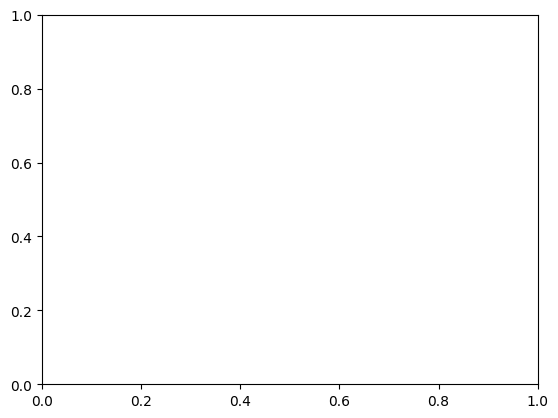

In [29]:
# Compare state-wise and state-less with #states (#critical_prob = vis_critical_prob)

vis_critical_prob = '0.8'

index = critical_prob_index[vis_critical_prob]
state_list = cfg['num_states_list']

def get_state_list(output_dict, index) :
    return [output_dict[str(s)][index] for s in state_list]

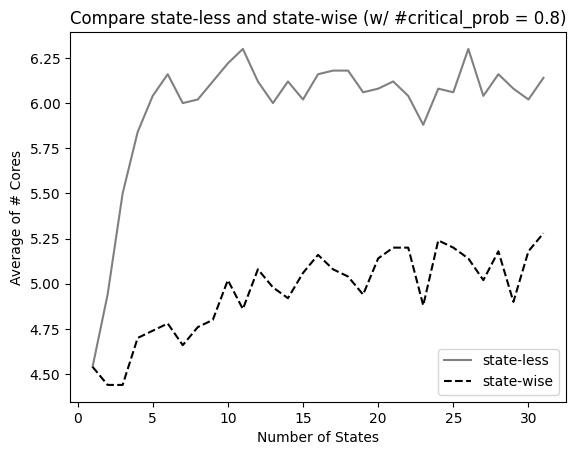

In [30]:
ax = plt.gca()

plt.plot(state_list, get_state_list(state_less, index), label='state-less', color='gray')
plt.plot(state_list, get_state_list(state_wise, index), label='state-wise', color='black', linestyle='dashed')

plt.title(f'Compare state-less and state-wise (w/ #critical_prob = {vis_critical_prob})')
plt.xlabel('Number of States')
plt.ylabel('Average of # Cores')
plt.legend()

ax.set_ylim([3, 8])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()